In [10]:
import pandas as pd
df = pd.read_csv('C:/Users/Pedro/Desktop/arquivos_exemplos/TCC/data_cleaning.csv',sep=';')
df = df.drop(columns=['index'])
df["ncm"] = df["ncm"].astype(str)
for i in range(len(df)):
  if len(df["ncm"].iloc[i]) < 8:
    df["ncm"].iloc[i] = "0"+ df["ncm"].iloc[i]
df['ncm'] = df['ncm'].astype(str).str[:2]


,descricao_item,ncm
0,BETAISTINA DICLOR MG CPS GEN Dicloridrato d...,30049069
1,BROMOPRIDA MG CPS GEN BROMOPRIDA,30049045
2,"DESLORATADINA ,MG ML XPE VD 6ML GEN DESLORAT...",30049069
3,ACETILCISTEINA 600MG G ENV G GEN ACETILCIST...,30049059
4,SANDALIA NEW AMAZONAS RETO CAVALERA INV 18 FEM...,64022000
...,...,...
343242,ZIN E MAQUINA DO VIDRO ESQUERDA PINO ALTO,87082999
343243,"ZINCO 100CM 3,50KG P MT CP",72104910
343244,ZMM 9010811 ALTERNADOR 12V AMP,85115010
343245,ZORDS COM FIGURA E,95030039


<Figure size 720x432 with 0 Axes>

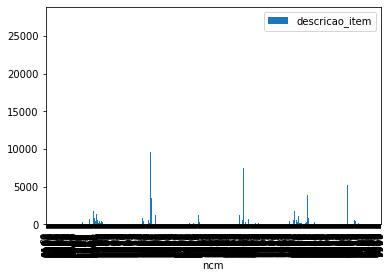

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df = df[['ncm','descricao_item']]
df.groupby('ncm').count().plot.bar(ylim=0)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

labels = df['ncm']
text = df['descricao_item']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.3)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)
X_test_transformed = tf_transformer.transform(X_test_counts)

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

#print(labels.classes_)

In [17]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed,y_train_lables_trf)
texts = ["COCA COLA 2L"]
p_count = count_vect.transform(texts)
p_tfidf = tf_transformer.transform(p_count)
predictions = clf.predict(p_tfidf)
for text, predicted in zip(texts, predictions):
  print(f'{text}')
  print(f"  - Predicted as: {labels.classes_[predicted]}")
  print("")

COCA COLA 2L
  - Predicted as: '159'

